### Importing Libraries

In [10]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Reading Data through pandas

In [11]:
df = pd.read_csv("iris.csv")
df = df.iloc[:,1:]

### Splittig Dataset into X and y (where X stands for features and y stands for tag) 

In [197]:
y = df.iloc[:100,4].values
y = np.where(y=='Iris-setosa',0,1)

In [199]:
X = df.iloc[:100,[0,2]].values

### Plotting Data

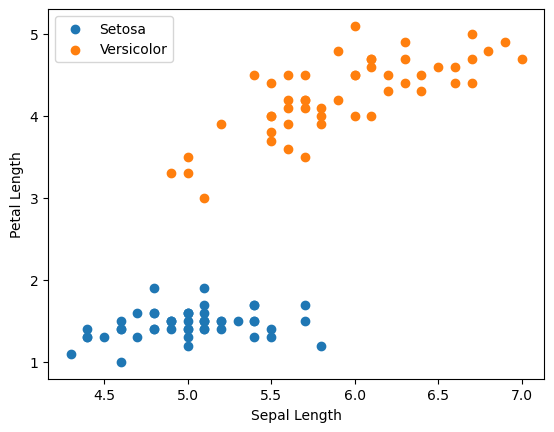

In [206]:
plt.scatter(X[:50,0],X[:50,1],label='Setosa')
plt.scatter(X[50:,0],X[50:,1],label='Versicolor')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(loc='upper left')
plt.show()

### Main Perceptron Algorithm (Accoding to Book)

In [210]:
class Perceptron_updated:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.z = []

    def fit(self,X,y):
        rgen = np.random.RandomState(99)
        self.w = rgen.normal(loc=0.0,scale=0.01,size=(X.shape[1],1))
        self.b = np.float64(0.)
        self.errors = []
        for e in range(self.n_iter):
            error = 0
            for i,target in zip(X,y):
                i = i.reshape(-1, 1)
                update = (self.eta*(target - self.predict(i.reshape(1,X.shape[1])))).reshape(-1)
                self.w += (update*i).reshape(X.shape[1],1)
                self.b += update
                error += int(update !=0)
            self.errors.append(error)
        return self 
    
    def net_input(self,X):
        self.z.append(np.dot(X,self.w) + self.b)
        return np.dot(X,self.w) + self.b

    def predict(self,X):
        return np.where(self.net_input(X)>0.,1,0)            

    def evaluate(self,x,y):
        predictions = self.predict(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]
        return accuracy  

### Plotting Errors vs Epochs 

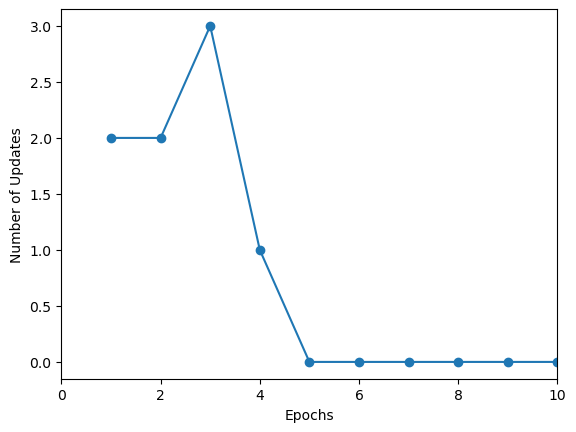

In [214]:
plt.plot(range(1,len(ppn.errors)+1),ppn.errors,marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Updates")
plt.xlim([0,10])
plt.show()

### Plotting Decision Boundary 

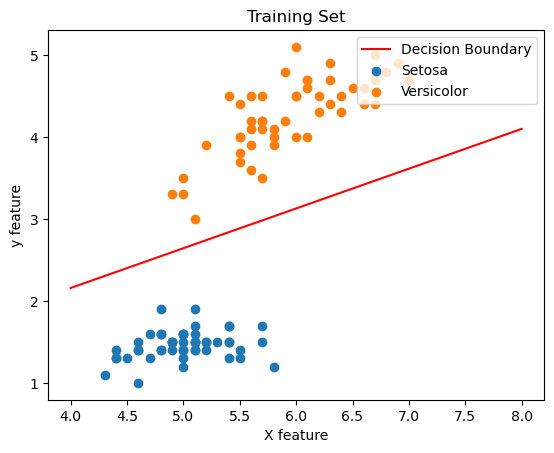

In [217]:
w1,w2 = ppn.w.reshape(-1)
b = ppn.b.reshape(-1)
x1 = np.linspace(4,8,100)
x2 = -(w1/w2) * x1 - (b/w2)
plt.plot(x1,x2,label="Decision Boundary",color='red')
plt.scatter(X[:50,0],X[:50,1],label='Setosa')
plt.scatter(X[50:,0],X[50:,1],label='Versicolor')
plt.legend(loc="upper right")
plt.title("Training Set")
plt.xlabel("X feature")
plt.ylabel("y feature")
plt.show()

### Decision Region class for more clear classsification 

In [222]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Step 1: Define colors and markers
    markers = ('o', 's', '^', 'v', '<')  # Different shapes for each class
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # Background colors
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Step 2: Create a grid of points
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Range for feature 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Range for feature 2
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],alpha=0.8,c=colors[idx],label=f"Class {cl}",edgecolor='black')
    

### Plotting Decision Region 

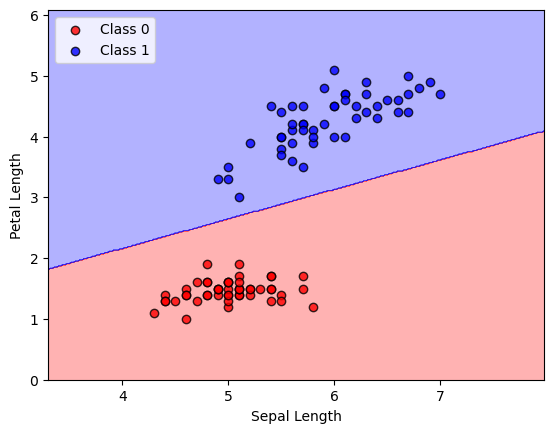

In [225]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(loc='upper left')
plt.show()